<a href="https://colab.research.google.com/github/RafaelAnga/AI_Learning/blob/main/Reinforced_Learning_thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [2]:
# Used to connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
 # Library necesary to access the folder route
import os
os.chdir('/content/drive/MyDrive/Machine Learning/Reinforcement Learning Models/DataSets')

#Lists the available directories
os.listdir()

['Ads_CTR_Optimisation.csv']

In [4]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [5]:
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_rewards = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_rewards += reward

## Visualising the results - Histogram

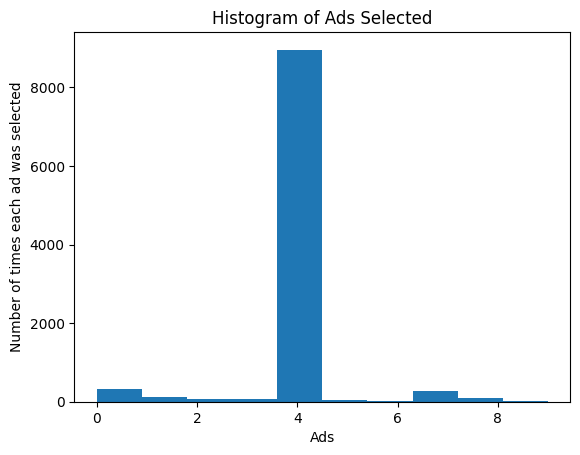

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()